In [122]:
import cptac
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import deva
import sklearn
import seaborn as sns
import binarization_functions as bf

In [105]:
re = cptac.Ccrcc()
proteomics = re.get_proteomics()
clinical = re.get_clinical()

In [115]:
annotations = clinical[['history_of_cancer','margin_status']].copy()

In [109]:
for col in annotations.columns:
    if "Unknown" in annotations[col].value_counts():
        annotations[col].replace('Unknown', np.nan)
    elif ' Unknown' in annotations[col].value_counts():
        annotations[col].replace(' Unknown', np.nan)
    elif 'Unknown ' in annotations[col].value_counts():
        annotations[col].replace('Unknown ', np.nan)

In [116]:
annotations = deva.binarize_annotations(annotations)

In [117]:
bf.renameDuplicateColumns(proteomics)

There are no duplicates


In [118]:
# 1.5-2 minutes
outliers, qvalues = deva.run_outliers(proteomics.transpose(), 
                                      annotations, 
                                      aggregate=False, 
                                      frac_filter = 0.3)

08/26/2019 15:55:51:WARNING:No rows tested for fisherFDR_history_of_cancer_No
08/26/2019 15:55:52:WARNING:No rows tested for fisherFDR_margin_status_Margins uninvolved by invasive carcinoma_Margins uninvolved by invasive carcinoma
08/26/2019 15:55:53:WARNING:No rows tested for fisherFDR_margin_status_Margin(s) involved by invasive carcinoma_not-Margin(s) involved by invasive carcinoma
08/26/2019 15:55:53:WARNING:No rows tested for fisherFDR_margin_status_Cannot be assessed_not-Cannot be assessed


In [ ]:
# 1.5 hours
outliers, qvalues = deva.run_outliers(proteomics.transpose(), 
                                      annotations, 
                                      aggregate=True, 
                                      frac_filter = 0.3)

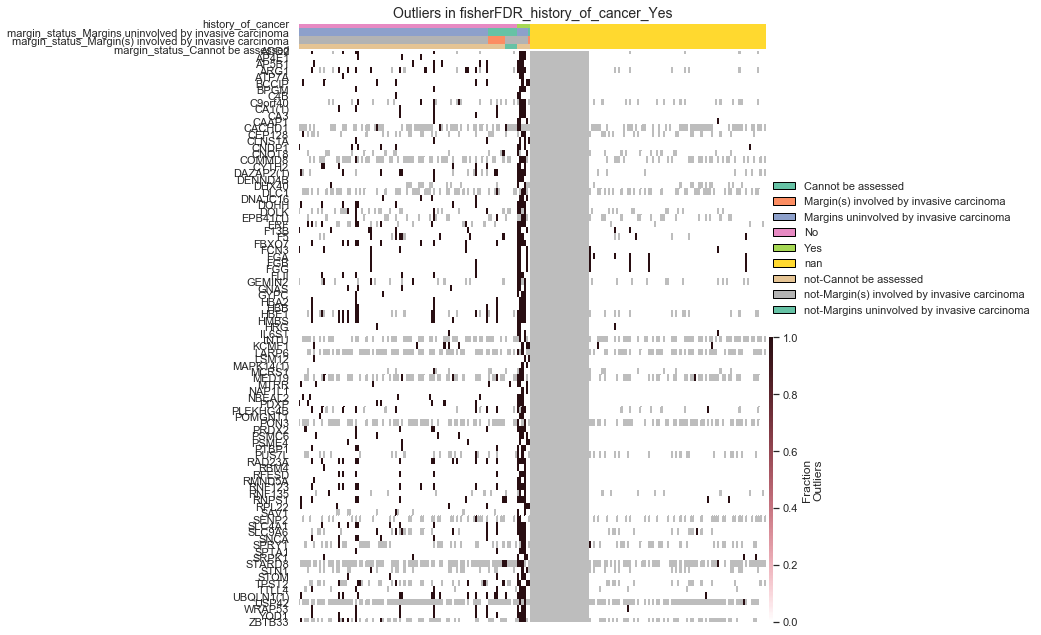

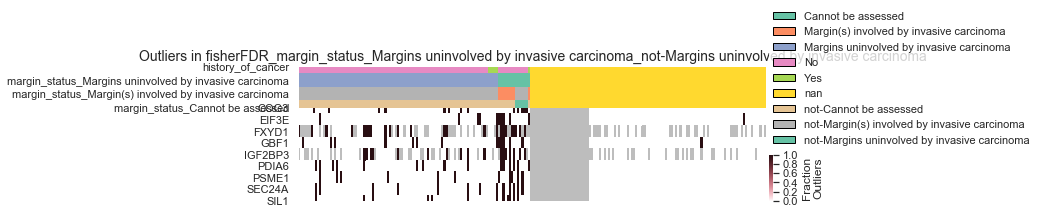

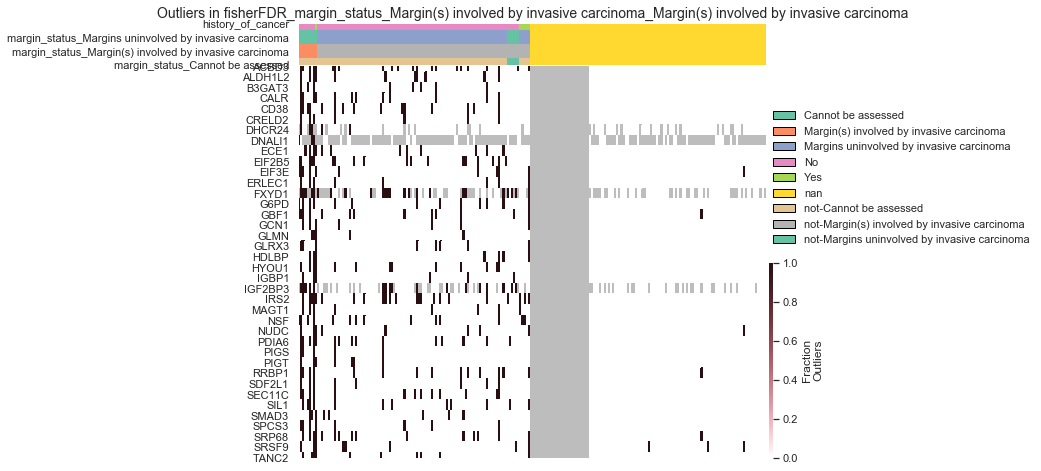

08/26/2019 15:56:02:WARNING:No significant genes at FDR 0.05 in fisherFDR_margin_status_Cannot be assessed_Cannot be assessed


In [119]:
# Pull out results
qvalues_table = qvalues.df
vis_table = outliers.frac_table

# Make heatmaps for significant genes
for col in qvalues_table.columns:
    deva.plot_heatmap(
        annotations=annotations, 
        qvals=qvalues_table,
        col_of_interest=col, 
        vis_table=vis_table)
    
    plt.show()
    plt.close()